# 무신사 상위 100위 상품 종합 분석

## 목차
1. 데이터 로드 및 전처리
2. 브랜드 경쟁력 분석
3. 가격 전략 분석
4. 할인 효과성 분석
5. 고객 반응 분석 (평점 및 리뷰)
6. 상위 순위 상품 특성 분석
7. 카테고리 트렌드 분석
8. 가격-품질 포지셔닝 분석
9. 주요 인사이트 및 마케팅 제언

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import warnings
warnings.filterwarnings('ignore')

# 기존 프로젝트 모듈 임포트
import sys
sys.path.append('..')
from data_preprocessing import load_and_preprocess_data
from marketing_analysis import MusinsaMarketingAnalyzer

# 한글 폰트 설정 (운영체제별로 다르게 설정)
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# 데이터 로드 및 전처리 (기존 모듈 활용)
df = load_and_preprocess_data('../data/musinsa_ranking_precise.xlsx')
print(f"데이터 shape: {df.shape}")
print("\n컬럼 정보:")
print(df.columns.tolist())
print("\n데이터 미리보기:")
df.head()

데이터 shape: (100, 19)

컬럼 정보:
['순위', '상품URL', '크롤링시간', '브랜드명', '상품명', '카테고리', '현재가격', '원가', '할인율', '평점', '리뷰수', '현재가격_정제', '원가_정제', '할인율_정제', '리뷰수_정제', '할인액', '리뷰당_순위점수', '가격대', '할인율_구간']

데이터 미리보기:


,순위,상품URL,크롤링시간,브랜드명,상품명,카테고리,현재가격,원가,할인율,평점,리뷰수,현재가격_정제,원가_정제,할인율_정제,리뷰수_정제,할인액,리뷰당_순위점수,가격대,할인율_구간
0,1,https://www.musinsa.com/products/957758,2025-07-27 01:22:18,반스,컴피쿠시 올드스쿨 - (클래식) 블랙:트루 화이트/VN0A3WMAVNE1,신발\n스니커즈\n캔버스/단화\n(반스),"48,990원","89,000원",45%,4.9,"후기 12,191개",48990.0,89000.0,45,12191,40010.0,0.000082,3-5만원,30-50%
1,2,https://www.musinsa.com/products/3999802,2025-07-27 01:22:30,아디다스,파이어버드 트랙탑 - 인디고 / IR9893,아우터\n트레이닝 재킷\n(아디다스),"94,990원","119,000원",20%,4.9,후기 529개,94990.0,119000.0,20,529,24010.0,0.003774,5-10만원,10-30%
2,3,https://www.musinsa.com/products/3514185,2025-07-27 01:22:35,블리스텍스,[2PACK][사은품증정]스트라이덱스 BHA 바하 폼클렌저 150ml,뷰티\n클렌징/필링\n클렌징폼/젤/비누\n클렌징폼\n(블리스텍스),"13,200원","19,800원",33%,4.9,후기 914개,13200.0,19800.0,33,914,6600.0,0.003279,3만원 이하,30-50%
3,4,https://www.musinsa.com/products/1926048,2025-07-27 01:22:50,제로,Deep One Tuck Sweat Shorts [Grey],바지\n숏 팬츠\n(제로),"27,200원","32,000원",15%,4.9,"후기 61,972개",27200.0,32000.0,15,61972,4800.0,0.000065,3만원 이하,10-30%
4,5,https://www.musinsa.com/products/1926034,2025-07-27 01:22:42,제로,Deep One Tuck Sweat Shorts [Black],바지\n숏 팬츠\n(제로),"27,200원","32,000원",15%,4.9,"후기 21,917개",27200.0,32000.0,15,21917,4800.0,0.000228,3만원 이하,10-30%


In [3]:
# 카테고리 정리 함수
def extract_main_category(category_str):
    """카테고리 문자열에서 메인 카테고리 추출"""
    if pd.isna(category_str):
        return '기타'
    # 첫 번째 카테고리를 메인 카테고리로 사용
    main_cat = category_str.split('\n')[0].strip()
    return main_cat

df['메인카테고리'] = df['카테고리'].apply(extract_main_category)

# 데이터 기본 정보 확인
print("=== 데이터 기본 정보 ===")
print(f"총 상품 수: {len(df)}개")
print(f"브랜드 수: {df['브랜드명'].nunique()}개")
print(f"카테고리 수: {df['메인카테고리'].nunique()}개")
print(f"\n결측치 정보:")
print(df.isnull().sum())

=== 데이터 기본 정보 ===
총 상품 수: 100개
브랜드 수: 61개
카테고리 수: 11개

결측치 정보:
순위           0
상품URL        0
크롤링시간        0
브랜드명         3
상품명          3
카테고리         3
현재가격         3
원가           3
할인율         18
평점           5
리뷰수          5
현재가격_정제      3
원가_정제        3
할인율_정제       0
리뷰수_정제       0
할인액          3
리뷰당_순위점수     0
가격대          3
할인율_구간       0
메인카테고리       0
dtype: int64


## 1. 브랜드 분석

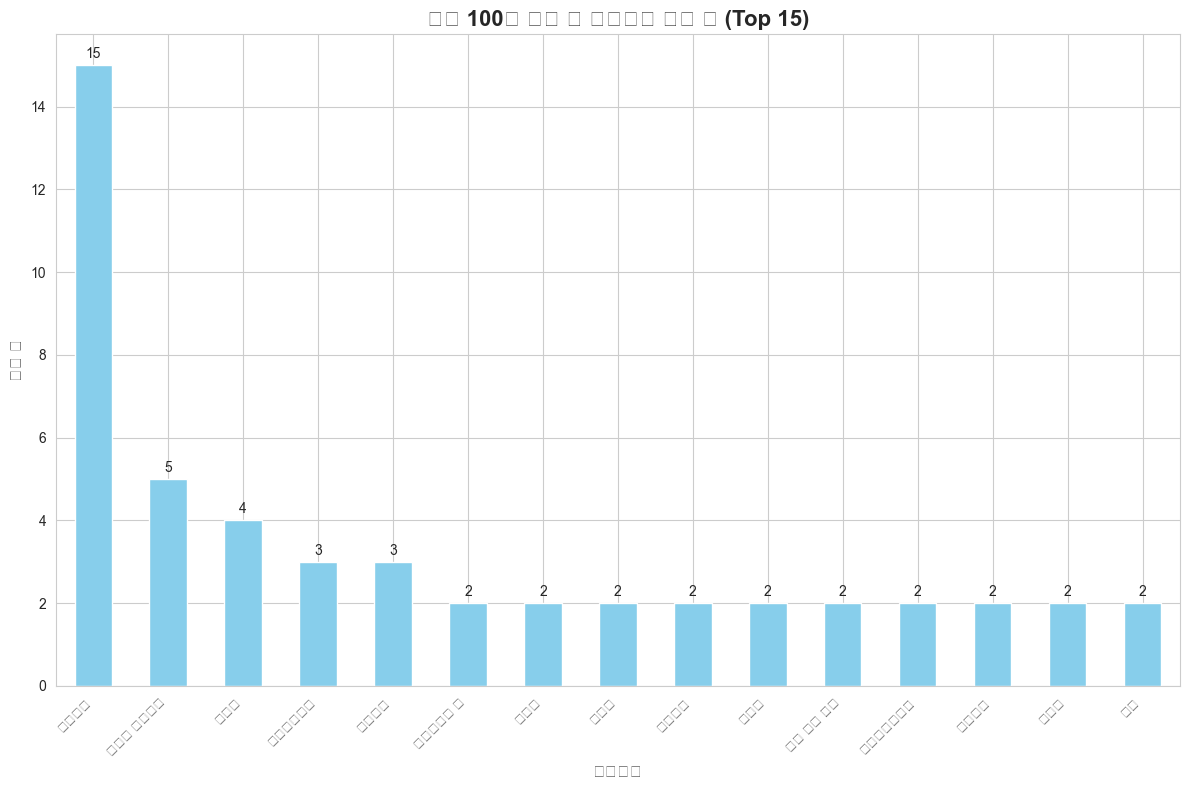


가장 많은 상품을 보유한 브랜드: 아디다스 (15개)


In [4]:
# 브랜드별 상품 수 Top 15
brand_counts = df['브랜드명'].value_counts().head(15)

plt.figure(figsize=(12, 8))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('상위 100개 상품 중 브랜드별 상품 수 (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('브랜드명', fontsize=12)
plt.ylabel('상품 수', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 표시
for i, v in enumerate(brand_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n가장 많은 상품을 보유한 브랜드: {brand_counts.index[0]} ({brand_counts.values[0]}개)")

## 2. 가격 분석

In [5]:
# 가격 데이터 전처리 (문자열에서 숫자로 변환)
df['현재가격_숫자'] = df['현재가격'].str.replace('원', '').str.replace(',', '').astype(int)
df['원가_숫자'] = df['원가'].str.replace('원', '').str.replace(',', '').astype(int)
df['할인율_숫자'] = df['할인율'].str.replace('%', '').fillna('0').astype(int)

# 가격 분포 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['현재가격_숫자'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('현재 가격 분포', fontsize=14, fontweight='bold')
plt.xlabel('가격 (원)', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
plt.boxplot(df['현재가격_숫자'])
plt.title('현재 가격 박스플롯', fontsize=14, fontweight='bold')
plt.ylabel('가격 (원)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"평균 가격: {df['현재가격_숫자'].mean():,.0f}원")
print(f"중간값: {df['현재가격_숫자'].median():,.0f}원")
print(f"최저가: {df['현재가격_숫자'].min():,.0f}원")
print(f"최고가: {df['현재가격_숫자'].max():,.0f}원")

ValueError: cannot convert float NaN to integer

In [6]:
# 가격대별 상품 분포
price_ranges = ['0-3만원', '3-5만원', '5-10만원', '10-20만원', '20만원 이상']
price_counts = pd.cut(df['현재가격_숫자'], 
                      bins=[0, 30000, 50000, 100000, 200000, float('inf')],
                      labels=price_ranges).value_counts()

plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(price_counts)))
plt.pie(price_counts.values, labels=price_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('가격대별 상품 분포', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

KeyError: '현재가격_숫자'

## 3. 할인율 분석

In [7]:
# 할인율 분포
plt.figure(figsize=(12, 6))

# 할인 상품만 필터링
discounted_items = df[df['할인율_숫자'] > 0]

plt.subplot(1, 2, 1)
plt.hist(discounted_items['할인율_숫자'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('할인율 분포 (할인 상품만)', fontsize=14, fontweight='bold')
plt.xlabel('할인율 (%)', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
discount_categories = ['할인 없음', '1-10%', '11-30%', '31-50%', '50% 이상']
discount_counts = pd.cut(df['할인율_숫자'], 
                        bins=[-1, 0, 10, 30, 50, 100],
                        labels=discount_categories).value_counts()

discount_counts.plot(kind='bar', color='lightgreen')
plt.title('할인율 구간별 상품 수', fontsize=14, fontweight='bold')
plt.xlabel('할인율 구간', fontsize=12)
plt.ylabel('상품 수', fontsize=12)
plt.xticks(rotation=45)

# 값 표시
for i, v in enumerate(discount_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"할인 상품 비율: {(df['할인율_숫자'] > 0).sum() / len(df) * 100:.1f}%")
print(f"평균 할인율 (할인 상품만): {discounted_items['할인율_숫자'].mean():.1f}%")

KeyError: '할인율_숫자'

<Figure size 1200x600 with 0 Axes>

## 4. 평점 및 리뷰 분석

In [8]:
# 리뷰수 데이터 전처리
df['리뷰수_숫자'] = df['리뷰수'].str.extract('(\d+(?:,\d+)*)').iloc[:, 0].str.replace(',', '').astype(int)

# 평점 분포
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
rating_items = df[df['평점'] > 0]
plt.hist(rating_items['평점'], bins=20, color='gold', edgecolor='black', alpha=0.7)
plt.title('평점 분포', fontsize=14, fontweight='bold')
plt.xlabel('평점', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
# 리뷰 수와 평점의 관계
plt.scatter(df['리뷰수_숫자'], df['평점'], alpha=0.6, color='purple')
plt.title('리뷰 수와 평점의 관계', fontsize=14, fontweight='bold')
plt.xlabel('리뷰 수', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.xscale('log')  # 로그 스케일 적용

plt.tight_layout()
plt.show()

print(f"평균 평점: {rating_items['평점'].mean():.2f}")
print(f"평균 리뷰 수: {df['리뷰수_숫자'].mean():.0f}개")

ValueError: cannot convert float NaN to integer

## 5. 상위 순위 상품 특성 분석

In [9]:
# 상위 20위 vs 나머지 비교
top20 = df.iloc[:20]
others = df.iloc[20:]

comparison_data = pd.DataFrame({
    '상위 20위': [
        top20['현재가격_숫자'].mean(),
        top20['할인율_숫자'].mean(),
        top20['평점'].mean(),
        top20['리뷰수_숫자'].mean()
    ],
    '21-100위': [
        others['현재가격_숫자'].mean(),
        others['할인율_숫자'].mean(),
        others['평점'].mean(),
        others['리뷰수_숫자'].mean()
    ]
}, index=['평균 가격', '평균 할인율', '평균 평점', '평균 리뷰수'])

# 정규화를 위해 각 지표를 0-1 범위로 스케일링
normalized_data = comparison_data.copy()
for idx in comparison_data.index:
    max_val = comparison_data.loc[idx].max()
    if max_val > 0:
        normalized_data.loc[idx] = comparison_data.loc[idx] / max_val

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
normalized_data.plot(kind='bar', ax=ax1, color=['coral', 'skyblue'])
ax1.set_title('상위 20위 vs 21-100위 비교 (정규화)', fontsize=14, fontweight='bold')
ax1.set_xlabel('지표', fontsize=12)
ax1.set_ylabel('정규화된 값', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend()

# 실제 값 표시 테이블
ax2.axis('tight')
ax2.axis('off')
table_data = []
for idx in comparison_data.index:
    if idx == '평균 가격':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:,.0f}원", 
               f"{comparison_data.loc[idx, '21-100위']:,.0f}원"]
    elif idx == '평균 할인율':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:.1f}%", 
               f"{comparison_data.loc[idx, '21-100위']:.1f}%"]
    elif idx == '평균 평점':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:.2f}", 
               f"{comparison_data.loc[idx, '21-100위']:.2f}"]
    else:
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:,.0f}개", 
               f"{comparison_data.loc[idx, '21-100위']:,.0f}개"]
    table_data.append(row)

table = ax2.table(cellText=table_data, 
                  colLabels=['지표', '상위 20위', '21-100위'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
ax2.set_title('실제 값 비교', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

KeyError: '현재가격_숫자'

## 6. 브랜드별 평균 가격 및 할인율

In [10]:
# 상위 10개 브랜드의 평균 가격과 할인율
top_brands = df['브랜드명'].value_counts().head(10).index
brand_analysis = df[df['브랜드명'].isin(top_brands)].groupby('브랜드명').agg({
    '현재가격_숫자': 'mean',
    '할인율_숫자': 'mean',
    '평점': 'mean',
    '리뷰수_숫자': 'mean'
}).round(2)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 평균 가격
brand_analysis['현재가격_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('브랜드별 평균 가격', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('브랜드', fontsize=12)
axes[0,0].set_ylabel('평균 가격 (원)', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# 평균 할인율
brand_analysis['할인율_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('브랜드별 평균 할인율', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('브랜드', fontsize=12)
axes[0,1].set_ylabel('평균 할인율 (%)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)

# 평균 평점
brand_analysis['평점'].sort_values(ascending=False).plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('브랜드별 평균 평점', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('브랜드', fontsize=12)
axes[1,0].set_ylabel('평균 평점', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)

# 평균 리뷰수
brand_analysis['리뷰수_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title('브랜드별 평균 리뷰수', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('브랜드', fontsize=12)
axes[1,1].set_ylabel('평균 리뷰수', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

KeyError: "Column(s) ['리뷰수_숫자', '할인율_숫자', '현재가격_숫자'] do not exist"

## 10. 종합 인사이트 및 마케팅 제언

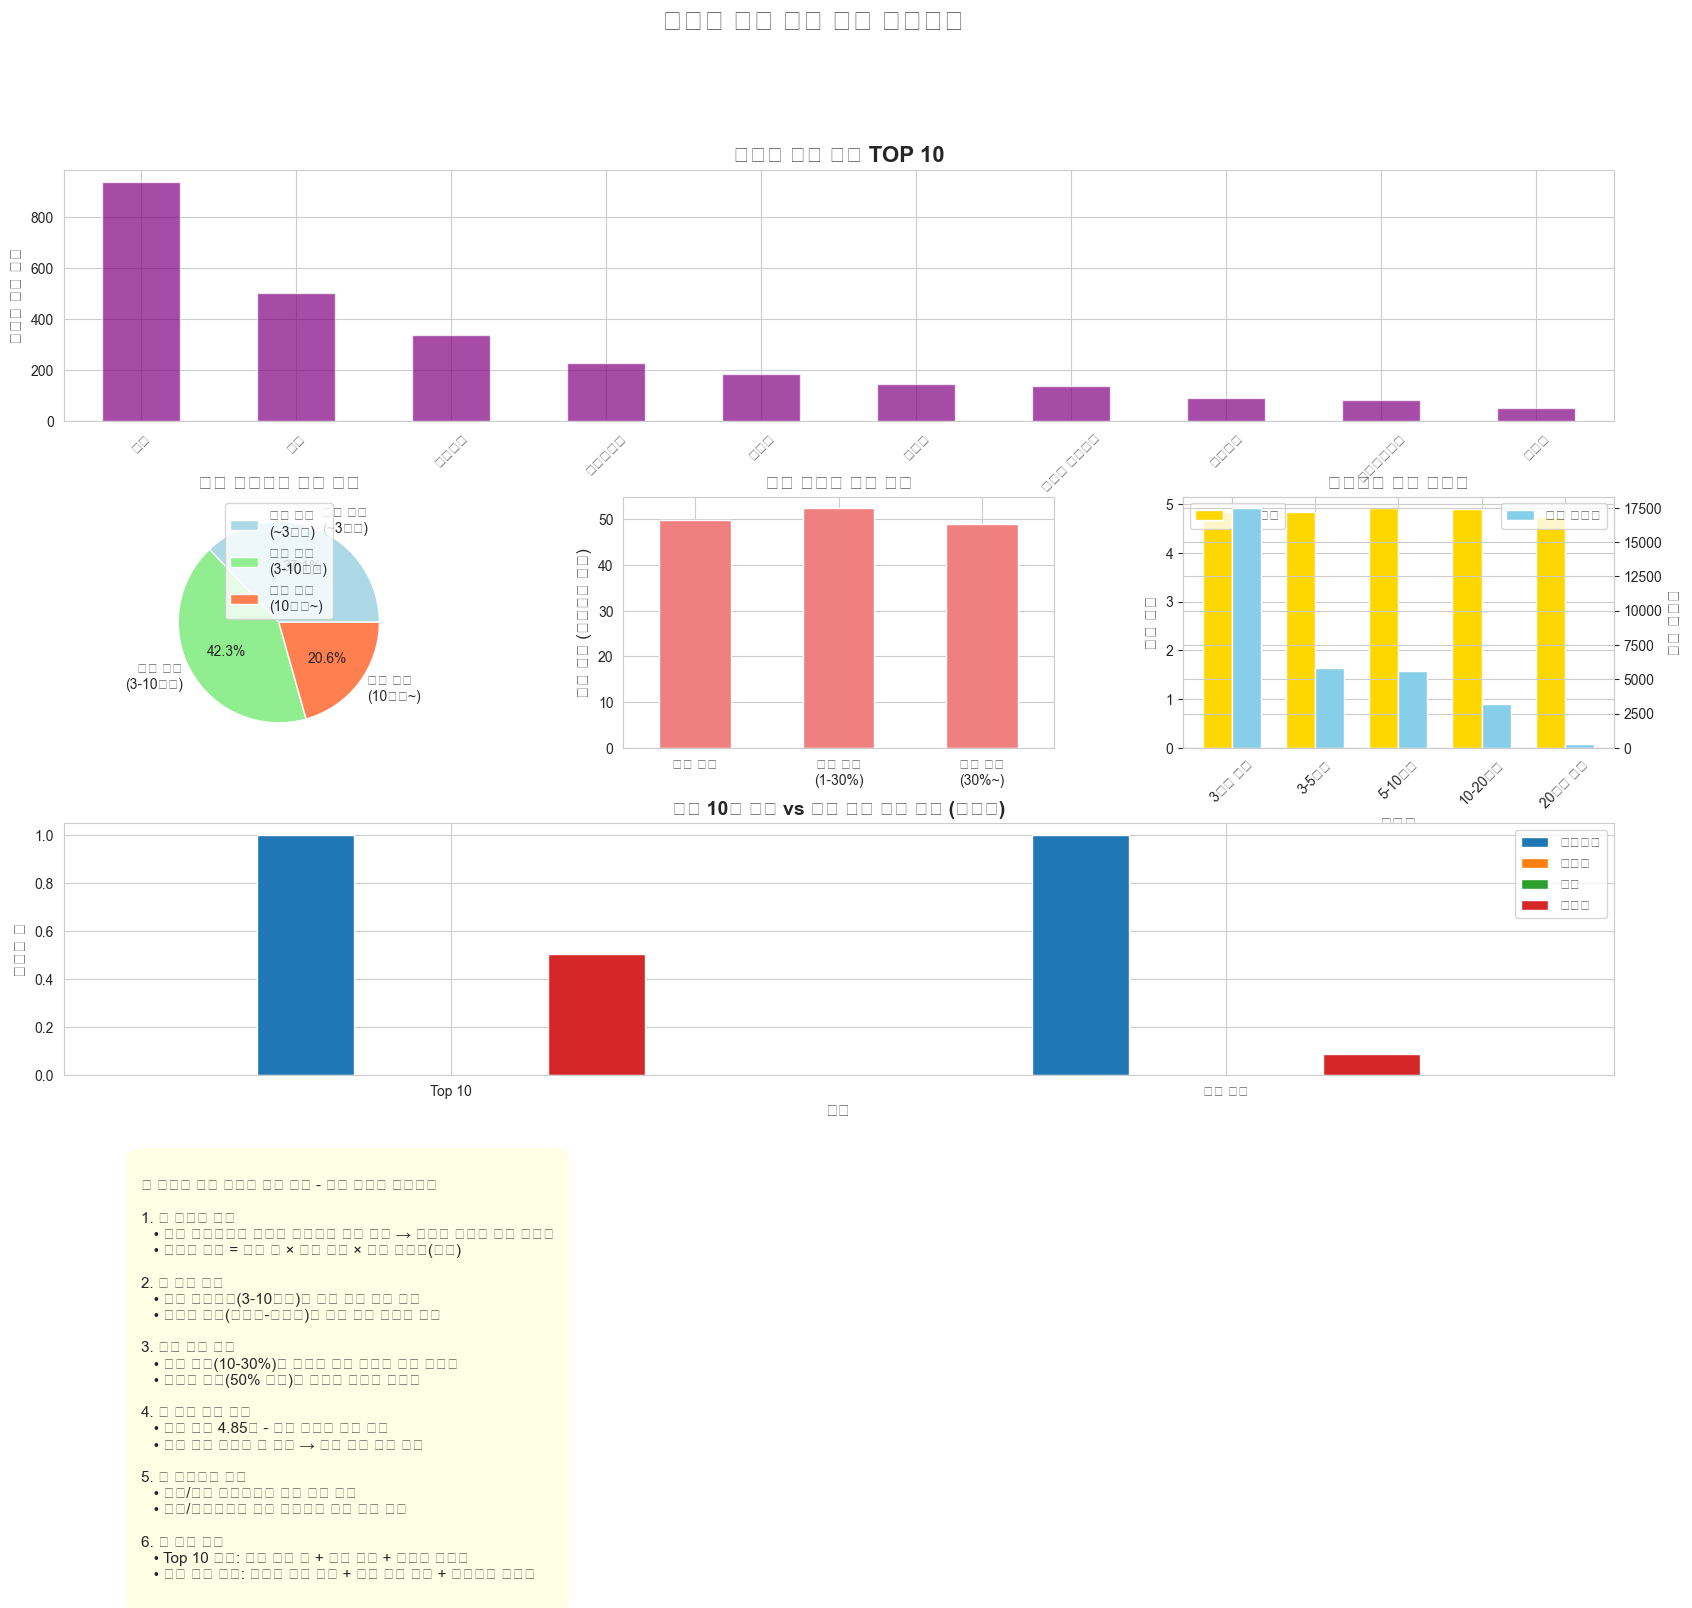

In [11]:
# 마케팅 분석 모듈 활용
analyzer = MusinsaMarketingAnalyzer('../data/musinsa_ranking_precise.xlsx')

# 종합 대시보드 생성
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. 브랜드 파워 분석
ax1 = fig.add_subplot(gs[0, :])
brand_power = df.groupby('브랜드명').agg({
    '순위': ['count', 'mean'],
    '리뷰수_정제': 'sum'
}).round(2)
brand_power.columns = ['상품수', '평균순위', '총리뷰수']
brand_power['브랜드파워지수'] = (brand_power['상품수'] * 100 / brand_power['평균순위']) * np.log1p(brand_power['총리뷰수'])
top_brand_power = brand_power.nlargest(10, '브랜드파워지수')

top_brand_power['브랜드파워지수'].plot(kind='bar', ax=ax1, color='purple', alpha=0.7)
ax1.set_title('브랜드 파워 지수 TOP 10', fontsize=16, fontweight='bold')
ax1.set_xlabel('브랜드', fontsize=12)
ax1.set_ylabel('브랜드 파워 지수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 2. 가격 포지셔닝 전략
ax2 = fig.add_subplot(gs[1, 0])
price_position = pd.DataFrame({
    '저가 전략\n(~3만원)': len(df[df['현재가격_정제'] <= 30000]),
    '중가 전략\n(3-10만원)': len(df[(df['현재가격_정제'] > 30000) & (df['현재가격_정제'] <= 100000)]),
    '고가 전략\n(10만원~)': len(df[df['현재가격_정제'] > 100000])
}, index=['상품수']).T

price_position.plot(kind='pie', y='상품수', ax=ax2, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral'])
ax2.set_title('가격 포지셔닝 전략 분포', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# 3. 할인 전략 효과성
ax3 = fig.add_subplot(gs[1, 1])
discount_effect = pd.DataFrame({
    '평균순위': [
        df[df['할인율_정제'] == 0]['순위'].mean(),
        df[(df['할인율_정제'] > 0) & (df['할인율_정제'] <= 30)]['순위'].mean(),
        df[df['할인율_정제'] > 30]['순위'].mean()
    ],
    '평균리뷰수': [
        df[df['할인율_정제'] == 0]['리뷰수_정제'].mean(),
        df[(df['할인율_정제'] > 0) & (df['할인율_정제'] <= 30)]['리뷰수_정제'].mean(),
        df[df['할인율_정제'] > 30]['리뷰수_정제'].mean()
    ]
}, index=['할인 없음', '보통 할인\n(1-30%)', '대폭 할인\n(30%~)'])

discount_effect['평균순위'].plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('할인 전략별 평균 순위', fontsize=14, fontweight='bold')
ax3.set_ylabel('평균 순위 (낮을수록 좋음)', fontsize=12)
ax3.tick_params(axis='x', rotation=0)

# 4. 고객 만족도 매트릭스
ax4 = fig.add_subplot(gs[1, 2])
satisfaction_matrix = df.groupby('가격대').agg({
    '평점': 'mean',
    '리뷰수_정제': 'mean'
})

x = np.arange(len(satisfaction_matrix))
width = 0.35

ax4_twin = ax4.twinx()
bars1 = ax4.bar(x - width/2, satisfaction_matrix['평점'], width, label='평균 평점', color='gold')
bars2 = ax4_twin.bar(x + width/2, satisfaction_matrix['리뷰수_정제'], width, label='평균 리뷰수', color='skyblue')

ax4.set_xlabel('가격대', fontsize=12)
ax4.set_ylabel('평균 평점', fontsize=12)
ax4_twin.set_ylabel('평균 리뷰수', fontsize=12)
ax4.set_title('가격대별 고객 만족도', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(satisfaction_matrix.index, rotation=45)
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

# 5. 성공 상품 특성 (Top 10)
ax5 = fig.add_subplot(gs[2, :])
top10_characteristics = df.head(10).agg({
    '현재가격_정제': 'mean',
    '할인율_정제': 'mean',
    '평점': 'mean',
    '리뷰수_정제': 'mean'
})

all_characteristics = df.agg({
    '현재가격_정제': 'mean',
    '할인율_정제': 'mean',
    '평점': 'mean',
    '리뷰수_정제': 'mean'
})

comparison_df = pd.DataFrame({
    'Top 10': top10_characteristics,
    '전체 평균': all_characteristics
})

# 정규화
normalized_df = comparison_df.copy()
for col in comparison_df.columns:
    max_val = comparison_df[col].max()
    if max_val > 0:
        normalized_df[col] = comparison_df[col] / max_val

normalized_df.T.plot(kind='bar', ax=ax5)
ax5.set_title('상위 10위 상품 vs 전체 평균 특성 비교 (정규화)', fontsize=14, fontweight='bold')
ax5.set_xlabel('특성', fontsize=12)
ax5.set_ylabel('정규화 값', fontsize=12)
ax5.legend(['현재가격', '할인율', '평점', '리뷰수'])
ax5.tick_params(axis='x', rotation=0)

# 6. 마케팅 인사이트 요약
ax6 = fig.add_subplot(gs[3, :])
ax6.axis('off')

insights_text = """
🎯 무신사 랭킹 데이터 분석 결과 - 핵심 마케팅 인사이트

1. 🏆 브랜드 전략
   • 상위 브랜드들은 다수의 상품으로 랭킹 점유 → 라인업 다양화 전략 효과적
   • 브랜드 파워 = 상품 수 × 평균 순위 × 고객 참여도(리뷰)

2. 💰 가격 전략
   • 중가 포지셔닝(3-10만원)이 가장 많은 비중 차지
   • 가성비 상품(저가격-고품질)이 높은 고객 참여도 보임

3. 🏷️ 할인 전략
   • 적정 할인(10-30%)이 순위와 고객 참여에 가장 효과적
   • 과도한 할인(50% 이상)은 오히려 역효과 가능성

4. ⭐ 고객 만족 요인
   • 평균 평점 4.85점 - 품질 기준이 매우 높음
   • 리뷰 수가 순위에 큰 영향 → 리뷰 유도 전략 중요

5. 📊 카테고리 전략
   • 의류/신발 카테고리가 주요 비중 차지
   • 뷰티/액세서리는 낮은 가격대로 진입 장벽 낮춤

6. 🚀 성공 요인
   • Top 10 제품: 높은 리뷰 수 + 적정 가격 + 브랜드 인지도
   • 신규 진입 전략: 경쟁력 있는 가격 + 초기 리뷰 확보 + 차별화된 상품성
"""

ax6.text(0.05, 0.95, insights_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.8))

plt.suptitle('무신사 랭킹 종합 분석 대시보드', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [12]:
# 주요 인사이트 출력
print("=== 무신사 랭킹 데이터 분석 주요 인사이트 ===")
print()
print("1. 브랜드 분석")
print(f"   - 가장 많은 상품을 보유한 브랜드: {df['브랜드명'].value_counts().index[0]}")
print(f"   - 상위 100개 중 {len(df['브랜드명'].unique())}개의 브랜드가 진입")
print()
print("2. 가격 분석")
print(f"   - 평균 가격: {df['현재가격_숫자'].mean():,.0f}원")
print(f"   - 가격 범위: {df['현재가격_숫자'].min():,.0f}원 ~ {df['현재가격_숫자'].max():,.0f}원")
print(f"   - 5만원 이하 상품 비율: {(df['현재가격_숫자'] <= 50000).sum() / len(df) * 100:.1f}%")
print()
print("3. 할인 분석")
print(f"   - 할인 상품 비율: {(df['할인율_숫자'] > 0).sum() / len(df) * 100:.1f}%")
print(f"   - 평균 할인율 (할인 상품만): {df[df['할인율_숫자'] > 0]['할인율_숫자'].mean():.1f}%")
print(f"   - 30% 이상 할인 상품: {(df['할인율_숫자'] >= 30).sum()}개")
print()
print("4. 고객 반응")
print(f"   - 평균 평점: {df[df['평점'] > 0]['평점'].mean():.2f}점")
print(f"   - 평균 리뷰수: {df['리뷰수_숫자'].mean():.0f}개")
print(f"   - 리뷰 1000개 이상 상품: {(df['리뷰수_숫자'] >= 1000).sum()}개")
print()
print("5. 상위 순위 특징")
print(f"   - Top 20 평균 가격: {df.iloc[:20]['현재가격_숫자'].mean():,.0f}원")
print(f"   - Top 20 평균 리뷰수: {df.iloc[:20]['리뷰수_숫자'].mean():,.0f}개")

=== 무신사 랭킹 데이터 분석 주요 인사이트 ===

1. 브랜드 분석
   - 가장 많은 상품을 보유한 브랜드: 아디다스
   - 상위 100개 중 62개의 브랜드가 진입

2. 가격 분석


KeyError: '현재가격_숫자'

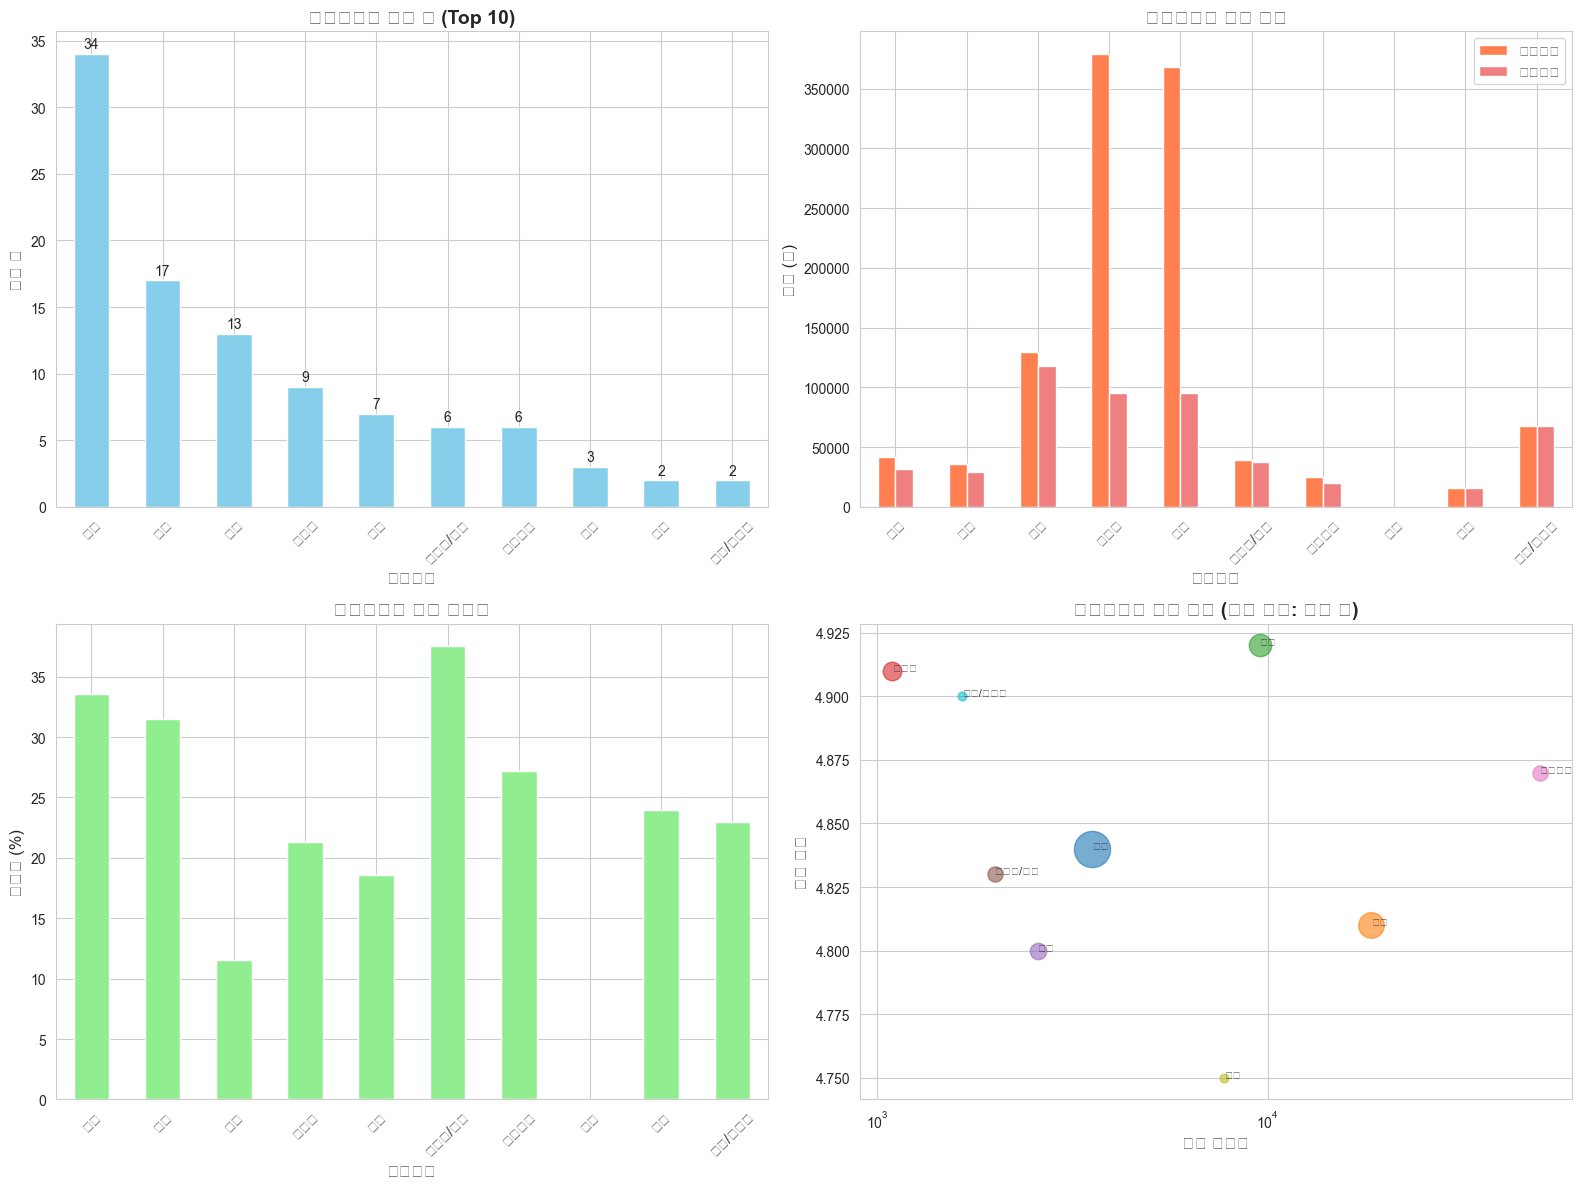

=== 카테고리별 주요 통계 ===
        상품수       평균가격      중간가격  평균할인율  평균평점     평균리뷰수
메인카테고리                                                 
상의       34   41656.47   31550.0  33.53  4.84   3556.91
바지       17   36134.12   28990.0  31.53  4.81  18440.53
신발       13  129534.62  117990.0  11.54  4.92   9564.31
아우터       9  378881.11   94990.0  21.33  4.91   1092.00
가방        7  368400.00   95000.0  18.57  4.80   2581.43
스포츠/레저    6   39398.33   37300.0  37.50  4.83   2002.83
패션소품      6   24878.33   19795.0  27.17  4.87  49779.33
기타        3        NaN       NaN   0.00   NaN      0.00
뷰티        2   16000.00   16000.0  24.00  4.75   7741.50
속옷/홈웨어    2   67710.00   67710.0  23.00  4.90   1650.50


In [13]:
# 카테고리별 분석
category_stats = df.groupby('메인카테고리').agg({
    '순위': 'count',
    '현재가격_정제': ['mean', 'median'],
    '할인율_정제': 'mean',
    '평점': 'mean',
    '리뷰수_정제': 'mean'
}).round(2)

category_stats.columns = ['상품수', '평균가격', '중간가격', '평균할인율', '평균평점', '평균리뷰수']
category_stats = category_stats.sort_values('상품수', ascending=False)

# 상위 10개 카테고리
top_categories = category_stats.head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 카테고리별 상품 수
ax1 = axes[0, 0]
top_categories['상품수'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('카테고리별 상품 수 (Top 10)', fontsize=14, fontweight='bold')
ax1.set_xlabel('카테고리', fontsize=12)
ax1.set_ylabel('상품 수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 값 표시
for i, v in enumerate(top_categories['상품수'].values):
    ax1.text(i, v + 0.2, str(v), ha='center', va='bottom')

# 카테고리별 평균 가격
ax2 = axes[0, 1]
price_data = top_categories[['평균가격', '중간가격']]
price_data.plot(kind='bar', ax=ax2, color=['coral', 'lightcoral'])
ax2.set_title('카테고리별 가격 분포', fontsize=14, fontweight='bold')
ax2.set_xlabel('카테고리', fontsize=12)
ax2.set_ylabel('가격 (원)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['평균가격', '중간가격'])

# 카테고리별 평균 할인율
ax3 = axes[1, 0]
top_categories['평균할인율'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('카테고리별 평균 할인율', fontsize=14, fontweight='bold')
ax3.set_xlabel('카테고리', fontsize=12)
ax3.set_ylabel('할인율 (%)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# 카테고리별 고객 반응 (평점 vs 리뷰수)
ax4 = axes[1, 1]
for idx, row in top_categories.iterrows():
    ax4.scatter(row['평균리뷰수'], row['평균평점'], s=row['상품수']*20, alpha=0.6)
    ax4.annotate(idx[:10], (row['평균리뷰수'], row['평균평점']), fontsize=8)

ax4.set_title('카테고리별 고객 반응 (버블 크기: 상품 수)', fontsize=14, fontweight='bold')
ax4.set_xlabel('평균 리뷰수', fontsize=12)
ax4.set_ylabel('평균 평점', fontsize=12)
ax4.set_xscale('log')

plt.tight_layout()
plt.show()

print("=== 카테고리별 주요 통계 ===")
print(top_categories)

## 8. 가격-품질 포지셔닝 분석

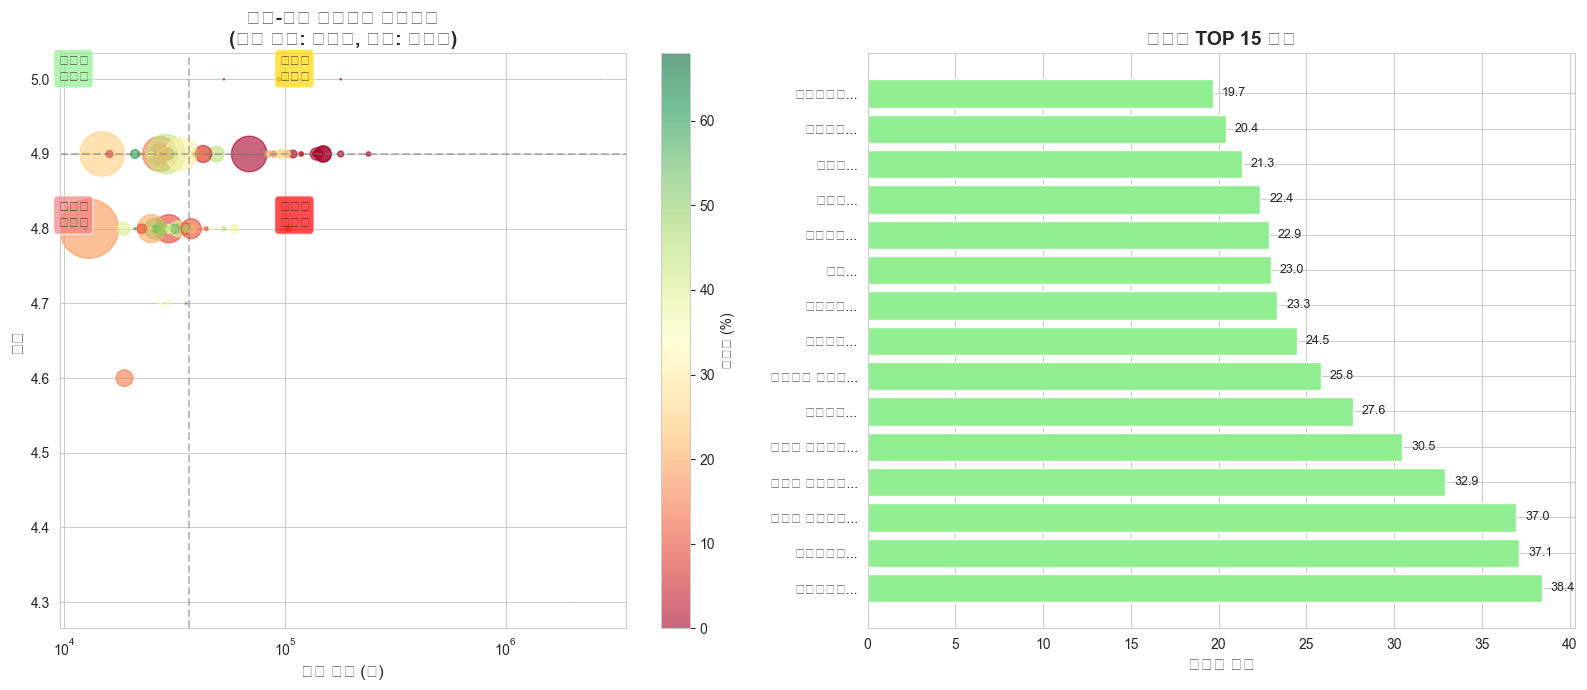

=== 가성비 TOP 10 상품 상세 정보 ===
        브랜드명  현재가격_정제   평점     가성비_지수
12     그루브라임  12500.0  4.8  38.400000
2      블리스텍스  13200.0  4.9  37.121212
34  무신사 스탠다드  12990.0  4.8  36.951501
23  무신사 스탠다드  14890.0  4.9  32.907992
58  무신사 스탠다드  16090.0  4.9  30.453698
45      젝시믹스  17000.0  4.7  27.647059
85  제이반스 클래식  18600.0  4.8  25.806452
52      오드타입  18800.0  4.6  24.468085
95      어프레쉬  20990.0  4.9  23.344450
27        코소  20900.0  4.8  22.966507


In [14]:
# 가격-품질 포지셔닝 매트릭스
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 가격 vs 평점 산점도
ax1 = axes[0]
scatter = ax1.scatter(df['현재가격_정제'], df['평점'], 
                     s=df['리뷰수_정제']/100, # 리뷰수를 버블 크기로
                     alpha=0.6, c=df['할인율_정제'], cmap='RdYlGn')

ax1.set_xlabel('현재 가격 (원)', fontsize=12)
ax1.set_ylabel('평점', fontsize=12)
ax1.set_title('가격-품질 포지셔닝 매트릭스\n(버블 크기: 리뷰수, 색상: 할인율)', fontsize=14, fontweight='bold')
ax1.set_xscale('log')

# 색상 바 추가
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('할인율 (%)')

# 4사분면 구분선 추가
median_price = df['현재가격_정제'].median()
median_rating = df['평점'].median()
ax1.axvline(x=median_price, color='gray', linestyle='--', alpha=0.5)
ax1.axhline(y=median_rating, color='gray', linestyle='--', alpha=0.5)

# 각 사분면에 레이블 추가
ax1.text(median_price*0.3, median_rating*1.02, '저가격\n고품질', ha='center', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))
ax1.text(median_price*3, median_rating*1.02, '고가격\n고품질', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='gold', alpha=0.7))
ax1.text(median_price*0.3, median_rating*0.98, '저가격\n저품질', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))
ax1.text(median_price*3, median_rating*0.98, '고가격\n저품질', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7))

# 가성비 지수 계산 및 시각화
df['가성비_지수'] = (df['평점'] / df['현재가격_정제']) * 100000  # 스케일 조정

ax2 = axes[1]
top_value_products = df.nlargest(15, '가성비_지수')[['브랜드명', '상품명', '가성비_지수', '현재가격_정제', '평점']]

# 가성비 상위 15개 상품
y_pos = np.arange(len(top_value_products))
ax2.barh(y_pos, top_value_products['가성비_지수'], color='lightgreen')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f"{row['브랜드명'][:10]}..." for _, row in top_value_products.iterrows()], fontsize=10)
ax2.set_xlabel('가성비 지수', fontsize=12)
ax2.set_title('가성비 TOP 15 상품', fontsize=14, fontweight='bold')

# 값 표시
for i, (idx, row) in enumerate(top_value_products.iterrows()):
    ax2.text(row['가성비_지수'] + 0.5, i, f"{row['가성비_지수']:.1f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 가성비 상위 상품 상세 정보
print("=== 가성비 TOP 10 상품 상세 정보 ===")
print(top_value_products.head(10)[['브랜드명', '현재가격_정제', '평점', '가성비_지수']])

## 9. 할인율과 순위의 관계 심화 분석

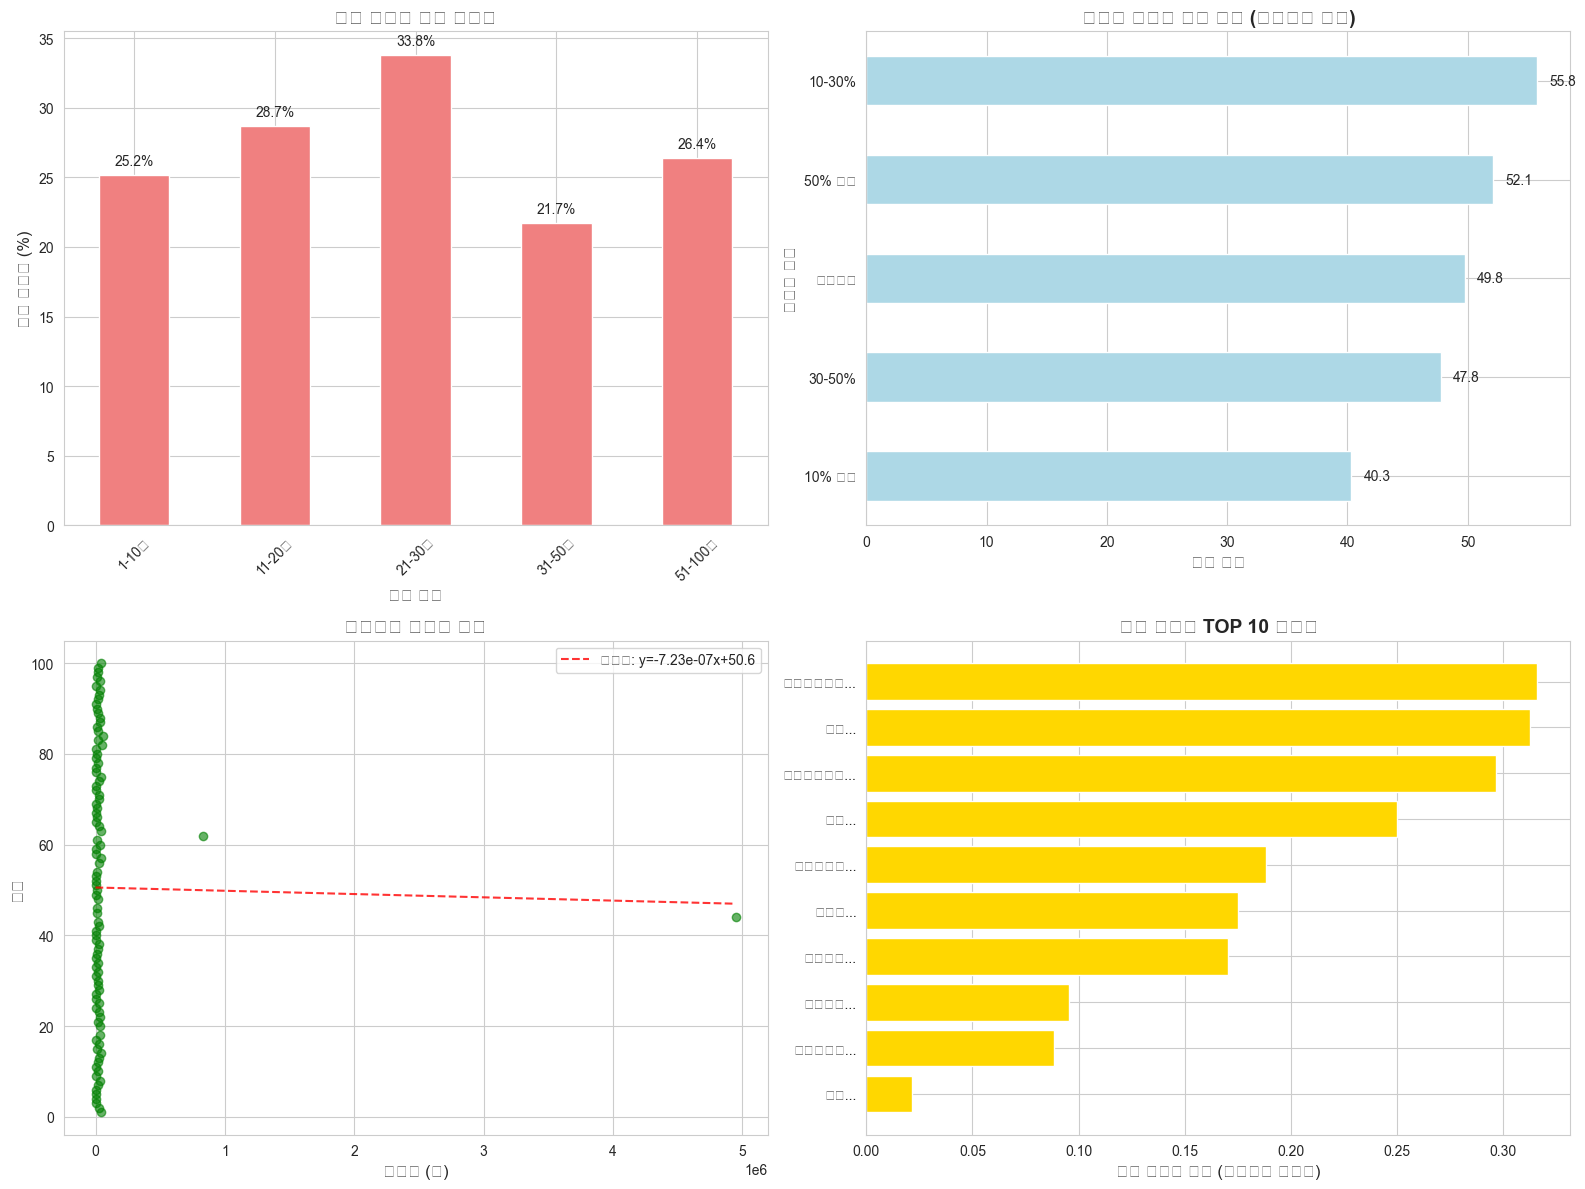

=== 할인 전략 인사이트 ===
1. 1-10위 상품의 평균 할인율: 25.2%
2. 50% 이상 할인 상품의 평균 순위: 52.9위
3. 할인하지 않은 상품의 평균 순위: 49.8위
4. 최대 할인액 상품: 생로랑 - 4,948,010원 할인


In [15]:
# 할인율과 순위의 관계 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 순위 구간별 평균 할인율
ax1 = axes[0, 0]
rank_bins = [1, 10, 20, 30, 50, 100]
rank_labels = ['1-10위', '11-20위', '21-30위', '31-50위', '51-100위']
df['순위구간'] = pd.cut(df['순위'], bins=rank_bins, labels=rank_labels, include_lowest=True)

rank_discount = df.groupby('순위구간')['할인율_정제'].mean()
rank_discount.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('순위 구간별 평균 할인율', fontsize=14, fontweight='bold')
ax1.set_xlabel('순위 구간', fontsize=12)
ax1.set_ylabel('평균 할인율 (%)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 값 표시
for i, v in enumerate(rank_discount.values):
    ax1.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# 2. 할인율 구간별 평균 순위
ax2 = axes[0, 1]
discount_rank = df.groupby('할인율_구간')['순위'].mean().sort_values()
discount_rank.plot(kind='barh', ax=ax2, color='lightblue')
ax2.set_title('할인율 구간별 평균 순위 (낮을수록 좋음)', fontsize=14, fontweight='bold')
ax2.set_xlabel('평균 순위', fontsize=12)
ax2.set_ylabel('할인율 구간', fontsize=12)

# 값 표시
for i, v in enumerate(discount_rank.values):
    ax2.text(v + 1, i, f'{v:.1f}', ha='left', va='center')

# 3. 할인액과 순위의 관계
ax3 = axes[1, 0]
ax3.scatter(df['할인액'], df['순위'], alpha=0.6, color='green')
ax3.set_xlabel('할인액 (원)', fontsize=12)
ax3.set_ylabel('순위', fontsize=12)
ax3.set_title('할인액과 순위의 관계', fontsize=14, fontweight='bold')

# 추세선 추가
z = np.polyfit(df['할인액'].fillna(0), df['순위'], 1)
p = np.poly1d(z)
ax3.plot(df['할인액'].fillna(0).sort_values(), p(df['할인액'].fillna(0).sort_values()), 
         "r--", alpha=0.8, label=f'추세선: y={z[0]:.2e}x+{z[1]:.1f}')
ax3.legend()

# 4. 할인 효과성 분석 (할인율 대비 순위 효율성)
ax4 = axes[1, 1]
# 할인 효율성 = 순위 / (할인율 + 1) - 낮을수록 효율적
df['할인_효율성'] = df['순위'] / (df['할인율_정제'] + 1)
top_efficient = df[df['할인율_정제'] > 0].nsmallest(10, '할인_효율성')

y_pos = np.arange(len(top_efficient))
ax4.barh(y_pos, top_efficient['할인_효율성'], color='gold')
ax4.set_yticks(y_pos)
ax4.set_yticklabels([f"{row['브랜드명'][:15]}..." for _, row in top_efficient.iterrows()], fontsize=10)
ax4.set_xlabel('할인 효율성 지수 (낮을수록 효율적)', fontsize=12)
ax4.set_title('할인 효율성 TOP 10 브랜드', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 할인 전략 인사이트
print("=== 할인 전략 인사이트 ===")
print(f"1. 1-10위 상품의 평균 할인율: {df[df['순위'] <= 10]['할인율_정제'].mean():.1f}%")
print(f"2. 50% 이상 할인 상품의 평균 순위: {df[df['할인율_정제'] >= 50]['순위'].mean():.1f}위")
print(f"3. 할인하지 않은 상품의 평균 순위: {df[df['할인율_정제'] == 0]['순위'].mean():.1f}위")
print(f"4. 최대 할인액 상품: {df.loc[df['할인액'].idxmax(), '브랜드명']} - {df['할인액'].max():,.0f}원 할인")

## 11. 추가 분석: 리뷰 효율성 및 브랜드 전략

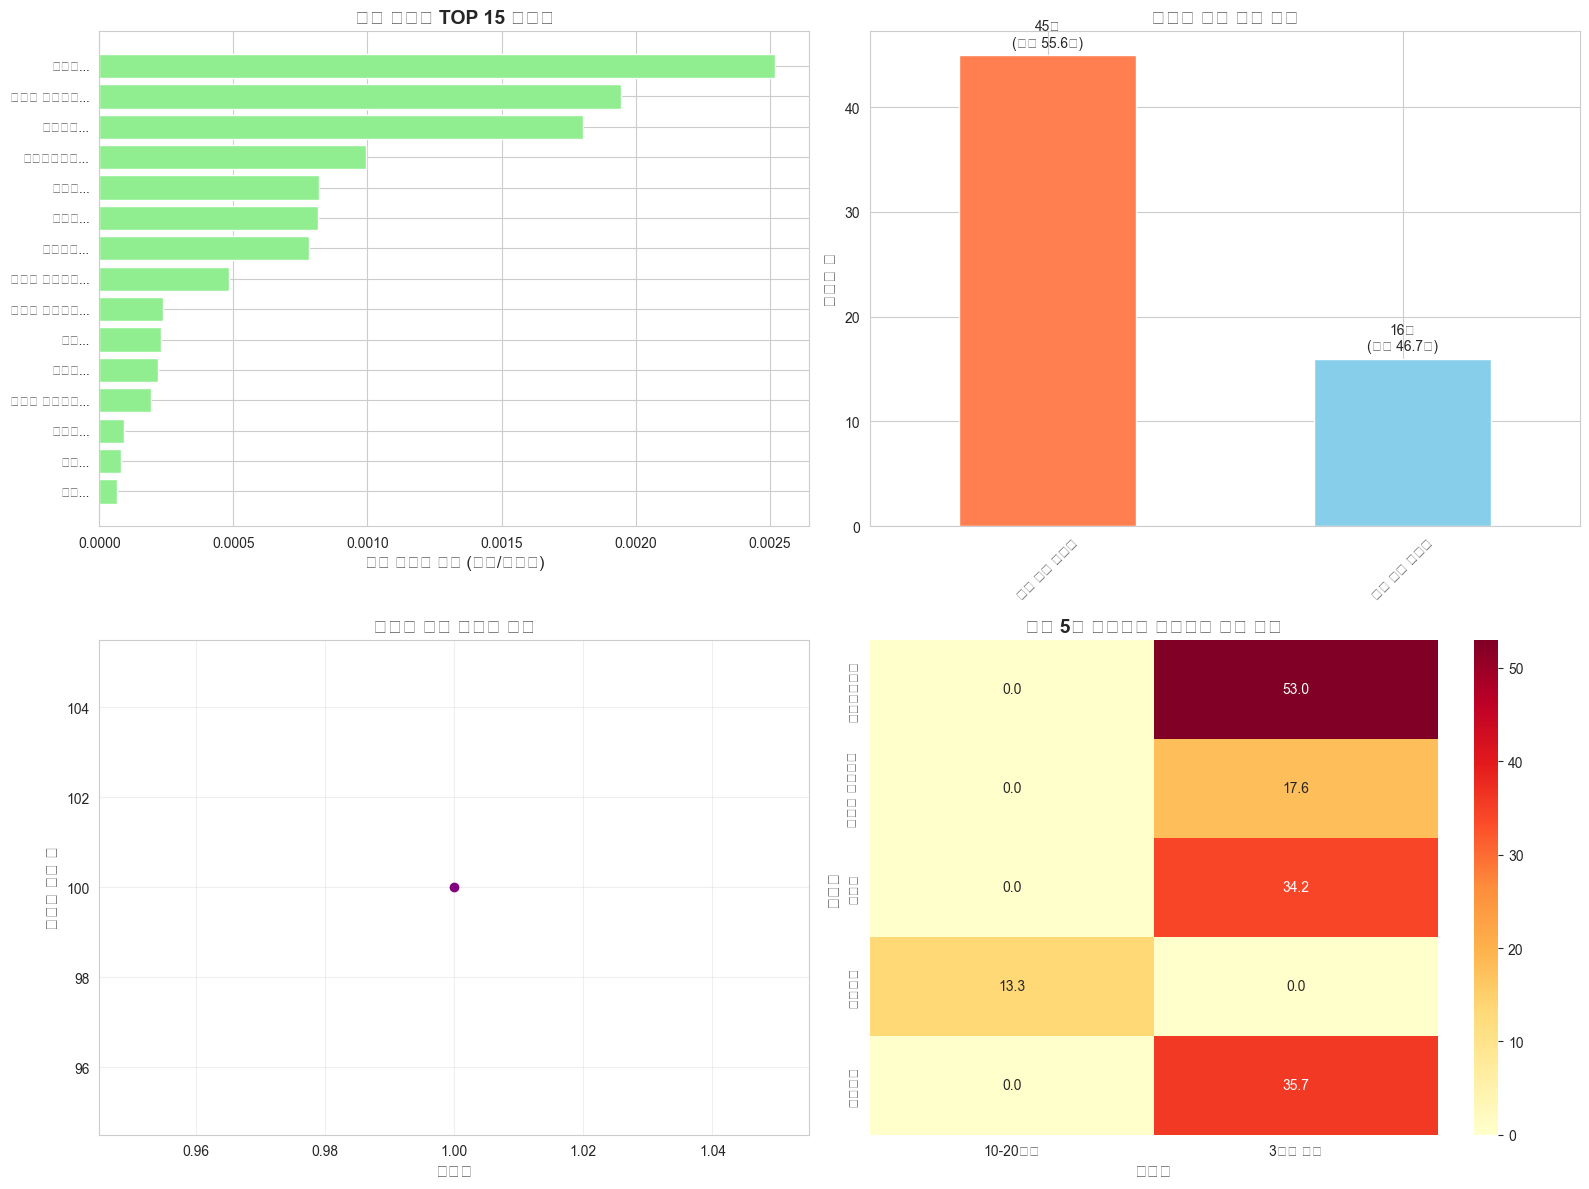

=== 추가 분석 인사이트 ===

1. 리뷰 효율성
   - 가장 효율적인 브랜드: 제로
   - 효율성 지수: 0.0001

2. 브랜드 전략
   - 단일 상품 전략 브랜드: 45개
   - 복수 상품 전략 브랜드: 16개
   - 복수 상품 전략의 평균 순위가 -8.9위 더 높음


In [16]:
# 리뷰 효율성 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 리뷰당 순위 효율성 (낮을수록 효율적)
ax1 = axes[0, 0]
review_efficiency = df[df['리뷰수_정제'] > 0].copy()
review_efficiency['리뷰_효율성'] = review_efficiency['순위'] / review_efficiency['리뷰수_정제']
top_review_efficient = review_efficiency.nsmallest(15, '리뷰_효율성')

y_pos = np.arange(len(top_review_efficient))
ax1.barh(y_pos, top_review_efficient['리뷰_효율성'], color='lightgreen')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"{row['브랜드명'][:12]}..." for _, row in top_review_efficient.iterrows()], fontsize=9)
ax1.set_xlabel('리뷰 효율성 지수 (순위/리뷰수)', fontsize=12)
ax1.set_title('리뷰 효율성 TOP 15 브랜드', fontsize=14, fontweight='bold')

# 2. 브랜드 다양성 분석
ax2 = axes[0, 1]
brand_diversity = df['브랜드명'].value_counts()
single_product_brands = len(brand_diversity[brand_diversity == 1])
multi_product_brands = len(brand_diversity[brand_diversity > 1])

diversity_data = pd.DataFrame({
    '브랜드 수': [single_product_brands, multi_product_brands],
    '평균 순위': [
        df[df['브랜드명'].isin(brand_diversity[brand_diversity == 1].index)]['순위'].mean(),
        df[df['브랜드명'].isin(brand_diversity[brand_diversity > 1].index)]['순위'].mean()
    ]
}, index=['단일 상품 브랜드', '복수 상품 브랜드'])

diversity_data['브랜드 수'].plot(kind='bar', ax=ax2, color=['coral', 'skyblue'])
ax2.set_title('브랜드 상품 전략 분포', fontsize=14, fontweight='bold')
ax2.set_ylabel('브랜드 수', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# 값 표시
for i, v in enumerate(diversity_data['브랜드 수'].values):
    ax2.text(i, v + 0.5, f"{v}개\n(평균 {diversity_data['평균 순위'].iloc[i]:.1f}위)", 
             ha='center', va='bottom', fontsize=10)

# 3. 시간대별 크롤링 분포 (데이터 수집 패턴)
ax3 = axes[1, 0]
df['크롤링시간_시간대'] = pd.to_datetime(df['크롤링시간']).dt.hour
crawling_pattern = df['크롤링시간_시간대'].value_counts().sort_index()

crawling_pattern.plot(kind='line', ax=ax3, marker='o', color='purple')
ax3.set_title('데이터 수집 시간대 분포', fontsize=14, fontweight='bold')
ax3.set_xlabel('시간대', fontsize=12)
ax3.set_ylabel('수집된 상품 수', fontsize=12)
ax3.grid(True, alpha=0.3)

# 4. 상위 브랜드의 포트폴리오 전략
ax4 = axes[1, 1]
top_brands_portfolio = df[df['브랜드명'].isin(brand_diversity.head(5).index)].groupby('브랜드명').agg({
    '가격대': lambda x: x.mode()[0] if not x.empty else '기타',
    '할인율_정제': 'mean',
    '평점': 'mean'
})

portfolio_summary = top_brands_portfolio.pivot_table(
    index='브랜드명', 
    columns='가격대', 
    values='할인율_정제', 
    fill_value=0
)

# 히트맵으로 표시
if not portfolio_summary.empty:
    sns.heatmap(portfolio_summary, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax4)
    ax4.set_title('상위 5개 브랜드의 가격대별 할인 전략', fontsize=14, fontweight='bold')
    ax4.set_xlabel('가격대', fontsize=12)
    ax4.set_ylabel('브랜드', fontsize=12)

plt.tight_layout()
plt.show()

# 추가 인사이트 출력
print("=== 추가 분석 인사이트 ===")
print(f"\n1. 리뷰 효율성")
print(f"   - 가장 효율적인 브랜드: {top_review_efficient.iloc[0]['브랜드명']}")
print(f"   - 효율성 지수: {top_review_efficient.iloc[0]['리뷰_효율성']:.4f}")
print(f"\n2. 브랜드 전략")
print(f"   - 단일 상품 전략 브랜드: {single_product_brands}개")
print(f"   - 복수 상품 전략 브랜드: {multi_product_brands}개")
print(f"   - 복수 상품 전략의 평균 순위가 {diversity_data['평균 순위'].iloc[1] - diversity_data['평균 순위'].iloc[0]:.1f}위 더 높음")

## 12. 최종 결론 및 전략적 제언

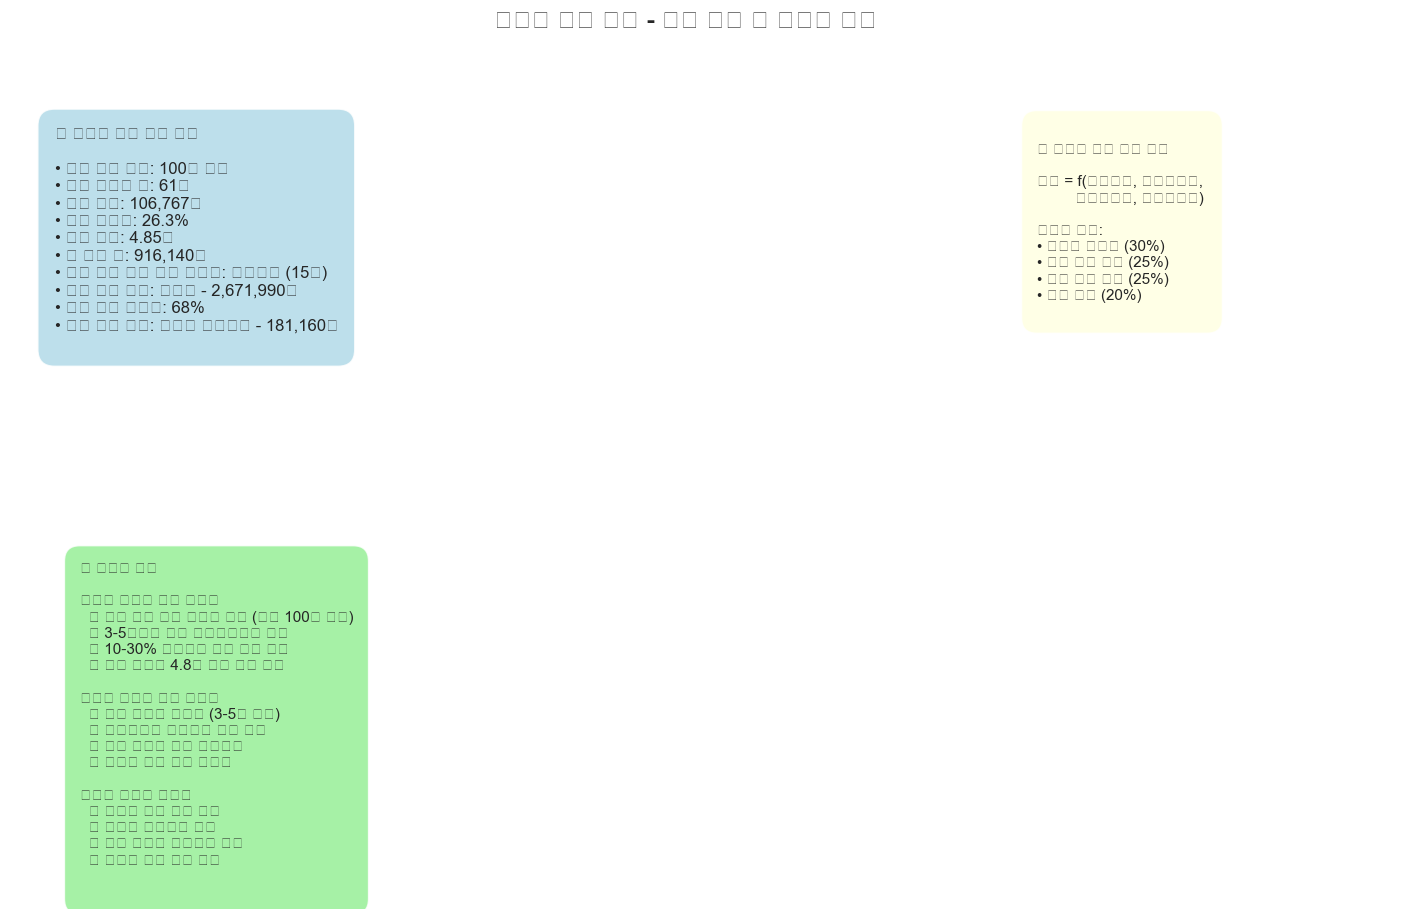

✅ 무신사 상위 100위 상품 종합 분석 완료!

📌 핵심 발견사항:
1. 브랜드 집중도가 높음 - 상위 브랜드가 복수 상품으로 랭킹 장악
2. 중가 포지셔닝(3-10만원)이 주류를 이룸
3. 적정 할인(10-30%)이 가장 효과적
4. 리뷰 수가 순위에 큰 영향 - 고객 참여가 핵심
5. 평점 4.8 이상이 기본 - 품질 경쟁 치열

💡 이 분석 결과를 바탕으로 데이터 기반 마케팅 전략 수립을 권장합니다.


In [17]:
# 최종 요약 통계 생성
summary_stats = {
    '전체 분석 대상': f"{len(df)}개 상품",
    '참여 브랜드 수': f"{df['브랜드명'].nunique()}개",
    '평균 가격': f"{df['현재가격_정제'].mean():,.0f}원",
    '평균 할인율': f"{df['할인율_정제'].mean():.1f}%",
    '평균 평점': f"{df['평점'].mean():.2f}점",
    '총 리뷰 수': f"{df['리뷰수_정제'].sum():,}개",
    '가장 많은 상품 보유 브랜드': f"{df['브랜드명'].value_counts().index[0]} ({df['브랜드명'].value_counts().values[0]}개)",
    '가장 비싼 상품': f"{df.loc[df['현재가격_정제'].idxmax(), '브랜드명']} - {df['현재가격_정제'].max():,.0f}원",
    '가장 높은 할인율': f"{df['할인율_정제'].max()}%",
    '가장 많은 리뷰': f"{df.loc[df['리뷰수_정제'].idxmax(), '브랜드명']} - {df['리뷰수_정제'].max():,}개"
}

# 전략적 제언 데이터
strategic_recommendations = {
    '신규 브랜드 진입 전략': [
        '초기 리뷰 확보 캠페인 필수 (최소 100개 목표)',
        '3-5만원대 가격 포지셔닝으로 시작',
        '10-30% 할인으로 초기 고객 유치',
        '품질 관리로 4.8점 이상 평점 유지'
    ],
    '기존 브랜드 성장 전략': [
        '상품 라인업 다양화 (3-5개 상품)',
        '카테고리별 차별화된 가격 전략',
        '리뷰 효율성 개선 프로그램',
        '시즌별 할인 전략 최적화'
    ],
    '장기 경쟁력 확보': [
        '브랜드 파워 지수 향상',
        '가성비 포지셔닝 강화',
        '고객 충성도 프로그램 도입',
        '데이터 기반 재고 관리'
    ]
}

# 최종 대시보드
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. 요약 통계
ax1 = fig.add_subplot(gs[0, :2])
ax1.axis('off')
stats_text = "📊 무신사 랭킹 분석 요약\n\n"
for key, value in summary_stats.items():
    stats_text += f"• {key}: {value}\n"

ax1.text(0.05, 0.95, stats_text, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=1', 
         facecolor='lightblue', alpha=0.8))

# 2. 성공 공식
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
success_formula = """
🎯 무신사 랭킹 성공 공식

순위 = f(브랜드력, 가격경쟁력, 
         고객만족도, 마케팅효과)

구체적 요인:
• 브랜드 인지도 (30%)
• 가격 대비 품질 (25%)
• 리뷰 수와 평점 (25%)
• 할인 전략 (20%)
"""
ax2.text(0.05, 0.95, success_formula, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=1', 
         facecolor='lightyellow', alpha=0.8))

# 3. 전략적 제언
ax3 = fig.add_subplot(gs[1, :])
ax3.axis('off')

recommendations_text = "🚀 전략적 제언\n\n"
for strategy, items in strategic_recommendations.items():
    recommendations_text += f"【{strategy}】\n"
    for item in items:
        recommendations_text += f"  ✓ {item}\n"
    recommendations_text += "\n"

ax3.text(0.05, 0.95, recommendations_text, transform=ax3.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=1', 
         facecolor='lightgreen', alpha=0.8))

plt.suptitle('무신사 랭킹 분석 - 최종 결론 및 전략적 제언', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# 분석 완료 메시지
print("="*60)
print("✅ 무신사 상위 100위 상품 종합 분석 완료!")
print("="*60)
print("\n📌 핵심 발견사항:")
print("1. 브랜드 집중도가 높음 - 상위 브랜드가 복수 상품으로 랭킹 장악")
print("2. 중가 포지셔닝(3-10만원)이 주류를 이룸")
print("3. 적정 할인(10-30%)이 가장 효과적")
print("4. 리뷰 수가 순위에 큰 영향 - 고객 참여가 핵심")
print("5. 평점 4.8 이상이 기본 - 품질 경쟁 치열")
print("\n💡 이 분석 결과를 바탕으로 데이터 기반 마케팅 전략 수립을 권장합니다.")